In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [36]:
from sklearn import metrics, model_selection, preprocessing
import time
import statistics

In [37]:
Ames = pd.read_csv('Ames_Modified.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.index = range(Ames.shape[0])

In [38]:
Nan_col = {}
for icol in Ames.columns:
    if (np.sum(pd.isna(Ames.loc[:,icol])!=0)):
        num_nan = np.sum(pd.isna(Ames.loc[:,icol]))
        Nan_col[icol] = num_nan

In [39]:
print('Features that have missed values are :')
Nan_col

Features that have missed values are :


{'Lot_Frontage': 490,
 'Mas_Vnr_Type': 23,
 'Mas_Vnr_Area': 23,
 'Bsmt_Qual': 80,
 'Bsmt_Exposure': 83,
 'Bsmt_Unf_SF': 1,
 'Total_Bsmt_SF': 1,
 'Bsmt_Full_Bath': 2,
 'Bsmt_Half_Bath': 2,
 'Fireplace_Qu': 1422,
 'Garage_Type': 157,
 'Garage_Finish': 159,
 'Garage_Cars': 1,
 'Garage_Area': 1,
 'Garage_Qual': 159,
 'basement_type': 81,
 'basement_area': 1,
 'garage_age': 159}

In [40]:
data = np.zeros((1,Ames.shape[1]))
for irow in range(Ames.shape[0]):
    if (np.sum(pd.isna(Ames.iloc[irow,:]))==0):
        data = np.vstack([data,Ames.iloc[irow,:].values])
data = data[1:,:]
Ames_clean = pd.DataFrame(data = data, columns = Ames.columns)
Ames_clean.index = range(Ames_clean.shape[0])

In [41]:
print("Shape of the scrapped dataset is :"+str(Ames.shape))
print("Shape of the dataset without any Nan is :"+str(Ames_clean.shape))

Shape of the scrapped dataset is :(2930, 59)
Shape of the dataset without any Nan is :(1156, 59)


In [42]:
1156/2930

0.3945392491467577

In [43]:
import random

In [44]:
selected_indices = list(set(random.choices(range(Ames_clean.shape[0]), k = int (Ames_clean.shape[0] * 0.3))))

In [45]:
print('Number of selected indices from clean dataset is :'+str(len(selected_indices)))
print('Shape of the dataset without any Nan is :'+str(Ames_clean.shape))

Number of selected indices from clean dataset is :310
Shape of the dataset without any Nan is :(1156, 59)


In [46]:
298/1156

0.2577854671280277

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
Ames_clean_nan       = Ames_clean.iloc[selected_indices,:]
Ames_clean_nan.index = selected_indices
Ames_clean_notnan    = Ames_clean_nan.copy()

rows_feature_nan = {}

for ifeature in Nan_col:
    
    rows_feature_nan[ifeature] = [] 
    
Nan_length = len(Nan_col.keys())
Nan_list = list(Nan_col.keys())

for irow in selected_indices:
    
    random_number = random.choices(range(1,Nan_length),k=1)[0]
    random_features = list(set(random.choices(Nan_list,k = random_number)))
    Ames_clean_nan.loc[irow,random_features] = np.nan
    for ifeature in random_features:
        rows_feature_nan[ifeature].append(irow) 

In [49]:
print('Size of Ames clean dataset are :' + str(Ames_clean.shape))
print('Size of Ames clean dataset "to be nan" are :' + str(Ames_clean_nan.shape))

Size of Ames clean dataset are :(1156, 59)
Size of Ames clean dataset "to be nan" are :(310, 59)


In [50]:
Nan_col

{'Lot_Frontage': 490,
 'Mas_Vnr_Type': 23,
 'Mas_Vnr_Area': 23,
 'Bsmt_Qual': 80,
 'Bsmt_Exposure': 83,
 'Bsmt_Unf_SF': 1,
 'Total_Bsmt_SF': 1,
 'Bsmt_Full_Bath': 2,
 'Bsmt_Half_Bath': 2,
 'Fireplace_Qu': 1422,
 'Garage_Type': 157,
 'Garage_Finish': 159,
 'Garage_Cars': 1,
 'Garage_Area': 1,
 'Garage_Qual': 159,
 'basement_type': 81,
 'basement_area': 1,
 'garage_age': 159}

In [51]:
temp_list = []
for ifeature in Ames_clean_nan.columns:
    if (np.sum(Ames_clean_nan.loc[:,ifeature].isna()) != 0):
        temp_list.append(ifeature)
print(set(temp_list)-set(Nan_col.keys()))

set()


In [52]:
Ames_clean_nan.sample(15)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
965,60,RL,NaN,10927,Reg,Lvl,Inside,Gtl,NridgHt,Norm,...,6,WD,Normal,275000,VinylSd_VinylSd,NaN,546.0,1,0,3.0
512,20,RL,313.0,27650,IR2,HLS,Inside,Mod,NAmes,PosA,...,11,WD,Normal,242000,Wd Sdng_Wd Sdng,NaN,NaN,48,47,48.0
36,20,RL,NaN,10593,IR1,Lvl,Inside,Gtl,NoRidge,Norm,...,3,WD,Normal,260400,VinylSd_VinylSd,NaN,NaN,14,0,14.0
361,20,RL,80.0,14000,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,8,WD,Family,158500,HdBoard_HdBoard,Unf_Unf,0.0,59,54,NaN
576,60,RL,NaN,63887,IR3,Bnk,Corner,Gtl,Edwards,Feedr,...,1,New,Partial,160000,Stucco_Stucco,NaN,NaN,0,0,NaN
862,50,RL,51.0,6821,Reg,HLS,Inside,Gtl,Crawfor,Norm,...,8,WD,Normal,146500,Wd Sdng_Wd Sdng,NaN,113.0,86,84,NaN
697,20,RL,NaN,10936,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,4,New,Partial,206580,VinylSd_VinylSd,Unf_Unf,0.0,1,0,NaN
1003,20,FV,62.0,7500,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,4,WD,Normal,176000,VinylSd_VinylSd,Unf_Unf,NaN,1,0,1.0
740,160,FV,34.0,3230,Reg,Lvl,Corner,Gtl,Somerst,Norm,...,6,WD,Normal,176000,MetalSd_MetalSd,GLQ_Unf,419.0,8,0,8.0
875,50,RL,110.0,7810,IR1,HLS,Inside,Gtl,Crawfor,Norm,...,11,WD,Normal,188000,0,GLQ_Unf,NaN,77,73,77.0


In [53]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])
Ordinal_featues = ['Overall_Qual','Overall_Cond']
Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area','Bsmt_Full_Bath','Bsmt_Half_Bath','Full_Bath','Half_Bath'])
Continous_features.extend(['Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces'])               
Continous_features.extend(['Garage_Cars','Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [54]:
fill_values = {}
for icol in Ames_clean_nan.columns:
    if (icol in categorical_features):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mode().values[0]
    elif ((icol in Ordinal_featues) | (icol in Continous_features)):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].median()
    else:
        print('Error for'+icol)

In [55]:
Ames_clean_nan_median = Ames_clean_nan.fillna(fill_values)

In [56]:
fill_values = {}
for icol in Ames_clean_nan.columns:
    if (icol in categorical_features):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mode().values[0]
    elif ((icol in Ordinal_featues) | (icol in Continous_features)):
        fill_values[icol] = Ames_clean_nan.loc[:,icol].mean()
    else:
        print('Error for'+icol)

In [57]:
Ames_clean_nan_mean = Ames_clean_nan.fillna(fill_values)

In [58]:
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [59]:
def sum_diag_fun(x):
    sum_diag = 0
    for i in range(len(x)):
        sum_diag = sum_diag + x[i,i]
    return sum_diag

In [60]:
n_neighbors = np.arange(1,50,1)
mean_error = {}
median_error = {}

for icol in Nan_col.keys():
    
    if (icol in categorical_features):
        
        try:
            
            data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                    Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values)
            median_error[icol] = np.round(100 * sum_diag_fun(data)/np.sum(np.sum(data)),2)
            data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                    Ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values)
            mean_error[icol] =   np.round(100 * sum_diag_fun(data)/(np.sum(np.sum(data))),2)
            
        except:
            
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                            Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values)
            
            median_error[icol] = np.round(100 * data,2)
            
            data = r2_score(ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                            ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values)
            
            mean_error[icol] =     np.round(100 * data,2)
            
    elif ((icol in Ordinal_featues) | (icol in Continous_features)):
        
        median_error[icol] =  np.round(100 * r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values, 
                                             Ames_clean_nan_median.loc[rows_feature_nan[icol],icol].values),2)
        mean_error[icol]   =  np.round(100 * r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                             Ames_clean_nan_mean.loc[rows_feature_nan[icol],icol].values),2)
    else:
        print('Error')

In [61]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data_oe_transformed = oe.fit_transform(Ames_clean_nan)
imputation_error = np.zeros((len(n_neighbors),len(Nan_col.keys())))

In [62]:
for index_neighbor, ineighbor in enumerate(n_neighbors):
    
    imputer = KNNImputer(n_neighbors=ineighbor)
    d = imputer.fit_transform(data_oe_transformed)
    d = oe.inverse_transform(d)
    df = pd.DataFrame(data = d, columns=Ames_clean_nan.columns, index = Ames_clean_nan.index)
    
    for index_col, icol in enumerate(Nan_col.keys()):
        
        if (icol in categorical_features):
            
            try:
                
                data = confusion_matrix(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                        df.loc[rows_feature_nan[icol],icol].values)
                imputation_error[index_neighbor,index_col] = np.round(100 * sum_diag_fun(data)/(sum(sum(data))),2)
                
            except:
                
                data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                df.loc[rows_feature_nan[icol],icol].values)
                imputation_error[index_neighbor,index_col] = np.round(100 * data,2)
                
        elif ((icol in Ordinal_featues) | (icol in Continous_features)):
            
            data = r2_score(Ames_clean_notnan.loc[rows_feature_nan[icol],icol].values,
                                df.loc[rows_feature_nan[icol],icol].values)
            imputation_error[index_neighbor,index_col] = np.round(100 * data,2)
            
imputation_error = pd.DataFrame(data=imputation_error,columns=Nan_col.keys(),index = n_neighbors)

In [64]:
median_error = pd.DataFrame(data = median_error, columns = Nan_col.keys(), index = [1])
mean_error = pd.DataFrame(data = mean_error, columns = Nan_col.keys(), index = [1])
imputation_error.to_csv('KNNImputation.csv')

In [65]:
Ames_clean.to_csv('AmesCleanDataSet.csv')

In [66]:
x_median = list(median_error.T.index.values)
y_median = [abs(x) for x in median_error.values.tolist()[0]]#[abs(ele) for ele in test_list]
x_mean   = list(mean_error.T.index.values) 
y_mean   = [abs(x) for x in mean_error.values.tolist()[0]]

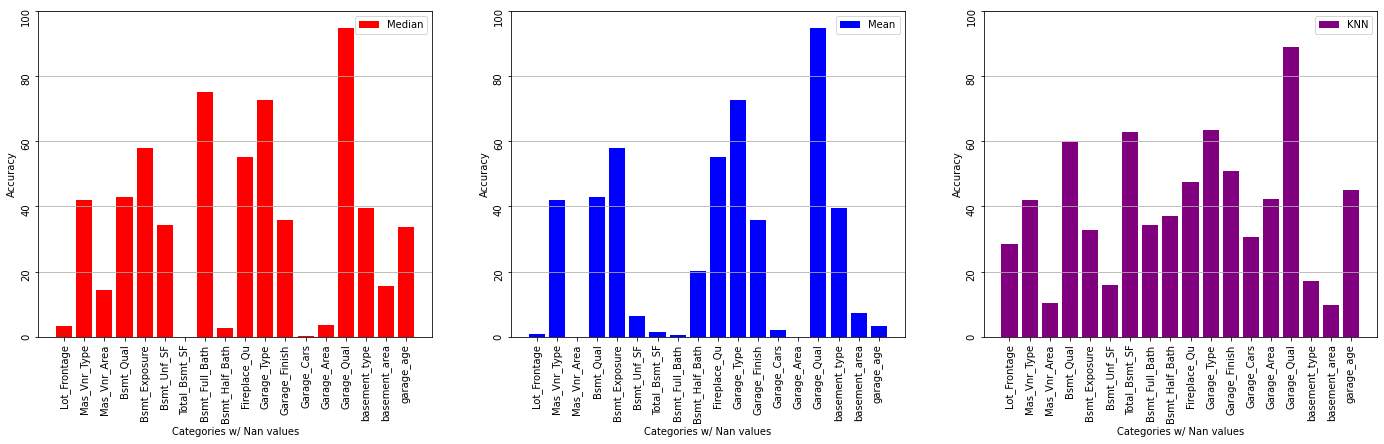

In [79]:
fig,ax = plt.subplots(1,3,figsize=(24,6))

ax[0].bar(x_median,np.abs(y_median),color='red',label='Median')
ax[0].set_xlabel('Categories w/ Nan values')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].set_xticks(x_median)
ax[0].tick_params(rotation=90.0)
ax[0].set_ylim([0,100])
ax[0].grid(axis="y")

ax[1].bar(x_mean,np.abs(y_mean),color='blue',label='Mean')
ax[1].set_xlabel('Categories w/ Nan values')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_xticks(x_mean)
ax[1].tick_params(rotation=90.0)
ax[1].set_ylim([0,100])
ax[1].grid(axis="y")

#After doing random forest regression and finding feature importance, we pick # of neighbors = 3

ax[2].bar(imputation_error.columns,np.abs(imputation_error.iloc[2,:].values),color='purple',label='KNN')
ax[2].set_xlabel('Categories w/ Nan values')
ax[2].set_ylabel('Accuracy')
ax[2].legend()
ax[2].set_xticks(x_mean,fontsize=16)
ax[2].tick_params(rotation=90.0)
ax[2].set_ylim([0,100])
ax[2].grid(axis="y")

In [70]:
imputation_error

,Lot_Frontage,Mas_Vnr_Type,Mas_Vnr_Area,Bsmt_Qual,Bsmt_Exposure,Bsmt_Unf_SF,Total_Bsmt_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,basement_type,basement_area,garage_age
1,-92.09,51.79,-33.73,61.61,53.27,-44.23,47.90,-28.30,-310.71,60.17,70.83,41.96,16.05,17.57,91.30,43.41,-1.81,40.43
2,18.95,42.86,-0.21,68.75,42.06,-20.43,60.84,-10.80,-71.13,39.83,59.17,50.00,37.95,43.97,90.43,24.03,14.90,41.40
3,28.45,41.96,10.30,59.82,32.71,-15.90,62.81,-34.13,-36.90,47.46,63.33,50.89,30.65,42.29,88.70,17.05,9.70,45.05
4,28.36,41.07,14.04,57.14,28.97,-5.93,63.99,-37.05,-2.68,37.29,59.17,48.21,30.65,44.33,85.22,13.18,11.18,46.68
5,31.43,42.86,16.72,53.57,28.97,-1.07,66.87,-39.96,-2.68,40.68,60.83,44.64,27.00,47.14,83.48,11.63,16.76,44.98
6,28.70,41.96,17.91,54.46,28.04,-1.05,68.09,-54.54,-2.68,34.75,56.67,41.96,21.53,48.73,80.87,12.40,17.37,46.13
7,29.74,37.50,18.37,52.68,28.04,1.93,67.97,-60.37,-2.68,33.90,56.67,41.07,17.88,49.96,80.87,12.40,17.30,44.84
8,27.79,37.50,20.56,47.32,22.43,-3.15,67.98,-60.37,-2.68,32.20,55.00,40.18,16.05,50.74,80.00,11.63,18.00,43.72
9,28.32,37.50,19.31,47.32,23.36,-7.82,68.84,-60.37,-2.68,40.68,59.17,40.18,10.58,50.72,77.39,10.85,16.67,41.94
10,28.32,39.29,18.28,47.32,24.30,-9.34,69.83,-60.37,-2.68,35.59,58.33,41.96,1.45,51.73,74.78,11.63,18.56,42.20
